In [1]:
#import + consolidate San Diego RIPA data into one massive df (result_df)

In [123]:
import pandas as pd   
import missingno as msno
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.geocoder import database, lookup
import datetime
from datetime import date
from astral.sun import sun
city = lookup("San Diego", database())

def convert_dtype_float(x):
    if not x:
        return 0
    try:
        return float(x)   
    except:        
        return 0
    
def convert_dtype_string(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''
    
convert_dict = {'date_stop': str}
    
contraband_evid_df = pd.read_csv("../data/ripa_contraband_evid_datasd.csv")                                
disability_df = pd.read_csv("../data/ripa_disability_datasd.csv")
gender_df = pd.read_csv("../data/ripa_gender_datasd.csv")
prop_seize_basis_df = pd.read_csv("../data/ripa_prop_seize_basis_datasd.csv")
prop_seize_type_df = pd.read_csv("../data/ripa_prop_seize_type_datasd.csv")
race_df = pd.read_csv("../data/ripa_race_datasd.csv")
stop_result_df = pd.read_csv("../data/ripa_stop_result_datasd.csv")
stop_reason_df = pd.read_csv("../data/ripa_stop_reason_datasd.csv", converters = {"reason_for_stopcode": convert_dtype_float})
stop_details_df = pd.read_csv("../data/ripa_stops_datasd.csv", converters = {"land_mark": convert_dtype_string}) 
stop_details_df = stop_details_df.astype(convert_dict)
result_df = df.merge(contraband_evid_df, disability_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, gender_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])
result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'])


In [151]:
contraband_evid_df

,stop_id,pid,contraband
0,2443,1,None
1,2444,1,None
2,2447,1,None
3,2447,2,None
4,2448,1,None
...,...,...,...
544471,478837,2,None
544472,478845,1,None
544473,478867,1,None
544474,478867,2,None


In [147]:
temp1 = stop_result_df[(stop_result_df.stop_id == 179543)]
temp1 = temp1[ (temp1.pid == 1)]


temp2 = contraband_evid_df[(contraband_evid_df.stop_id == 179543)]
temp2 = temp2[(temp2.pid == 1)]


temp = pd.merge(temp1,temp2, how="outer", on=["stop_id","pid"])


In [150]:
temp2

,stop_id,pid,contraband
197659,179543,1,Firearm(s)
197660,179543,1,Ammunition
197661,179543,1,Weapon(s) other than a firearm
197662,179543,1,Money
197663,179543,1,Drug Paraphernalia
197664,179543,1,Suspected Stolen property
197665,179543,1,Cell phone(s) or electronic device(s)


In [148]:
temp

,stop_id,pid,resultkey,result,code,resulttext,contraband
0,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Firearm(s)
1,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Ammunition
2,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Weapon(s) other than a firearm
3,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Money
4,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Drug Paraphernalia
5,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Suspected Stolen property
6,179543,1,6,Custodial Arrest without warrant,28037.0,496(D) PC - ATT 496 PC:STOLEN PROP (F) 28037,Cell phone(s) or electronic device(s)
7,179543,1,6,Custodial Arrest without warrant,66102.0,979 PC - BENCH WARRANT:FTA FEL CHG (F) 66102,Firearm(s)
8,179543,1,6,Custodial Arrest without warrant,66102.0,979 PC - BENCH WARRANT:FTA FEL CHG (F) 66102,Ammunition
9,179543,1,6,Custodial Arrest without warrant,66102.0,979 PC - BENCH WARRANT:FTA FEL CHG (F) 66102,Weapon(s) other than a firearm


In [3]:
from datetime import time
def dateToSunrise(dt):
    if (type(dt) == float):
        return dt #need to fix this
    d = dt.date()
    s = sun(city.observer, date=d, tzinfo=city.timezone)
    return s['sunrise']

def dateToSunset(dt):
    if (type(dt) == float):
        return dt #need to fix this
    d = dt.date()
    s = sun(city.observer, date=d, tzinfo=city.timezone)
    return s['sunset']
    
result_df['sunrise'] = result_df['datetime_stop'].map(dateToSunrise)
result_df['sunset'] = result_df['datetime_stop'].map(dateToSunset)

In [4]:
def dateToDawn(dt):
    if (type(dt) == float):
        return dt #need to fix this
    d = dt.date()
    s = sun(city.observer, date=d, tzinfo=city.timezone)
    return s['dawn']

def dateToDusk(dt):
    if (type(dt) == float):
        return dt #need to fix this
    d = dt.date()
    s = sun(city.observer, date=d, tzinfo=city.timezone)
    return s['dusk']
         
def isDaytime(dt):
    if (type(dt) == float):
       return  False # need to fix this 
    if dt.time() > dateToDawn(dt).time() and dt.time() < dateToDusk(dt).time():
        return True
    else:
        return False
    
def isDaytimeFudged(dt):
    if (type(dt) == float):
       return  False # need to fix this 
    dawnFudged =  dateToDawn(dt) + pd.DateOffset(hours=1)
    duskFudged =  dateToDusk(dt) - pd.DateOffset(hours=1)
    if dt.time() > dawnFudged.time() and dt.time() < duskFudged.time():
        return True
    else:
        return False
    
result_df['dawn'] = result_df['datetime_stop'].map(dateToSunrise)
result_df['dusk'] = result_df['datetime_stop'].map(dateToSunset)
result_df['is_daytime'] = result_df['datetime_stop'].map(isDaytime)
result_df['is_daytime_fudged'] = result_df['datetime_stop'].map(isDaytimeFudged)

In [5]:
earliestDawn = pd.to_datetime('05:11', format = '%H:%M')
latestDawn = pd.to_datetime('06:42', format = '%H:%M')
earliestDusk = pd.to_datetime('17:09', format = '%H:%M')
latestDusk = pd.to_datetime('20:29', format = '%H:%M')

def withinPeriods(dt):
    if (type(dt) == float):
       return  False # need to fix this 
    if dt.time() > earliestDawn.time() and dt.time() < latestDawn.time():
        return False
    elif dt.time() > earliestDusk.time() and dt.time() < latestDusk.time():
        return False
    else:
        return True
    
result_df['original_VOD'] = result_df['datetime_stop'].map(withinPeriods)


In [6]:
#result_df.drop(['date_stop', 'time_stop'], axis=1, inplace=True)

In [7]:
result_df

,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,result,...,gend_nc,perceived_lgbt,datetime_stop,sunrise,sunset,dawn,dusk,is_daytime,is_daytime_fudged,original_VOD
0,2443.0,1.0,None,None,Male,NaN,NaN,White,6.0,Custodial Arrest without warrant,...,NaN,No,2018-07-01 00:01:37,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,False,False,True
1,2444.0,1.0,None,None,Male,NaN,NaN,White,2.0,Warning (verbal or written),...,NaN,No,2018-07-01 00:03:34,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,False,False,True
2,2447.0,1.0,None,None,Male,NaN,NaN,Hispanic/Latino/a,1.0,No Action,...,NaN,No,2018-07-01 00:05:43,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,False,False,True
3,2447.0,2.0,None,None,Female,NaN,NaN,Hispanic/Latino/a,1.0,No Action,...,NaN,No,2018-07-01 00:05:43,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,False,False,True
4,2448.0,1.0,None,None,Male,NaN,NaN,White,1.0,No Action,...,NaN,No,2018-07-01 00:19:06,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,2018-07-01 05:44:42.442709-07:00,2018-07-01 20:00:13.737456-07:00,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707935,478845.0,1.0,None,None,Male,NaN,NaN,White,10.0,Psychiatric hold,...,NaN,No,2021-09-30 21:00:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,False,False,True
707936,478867.0,1.0,None,None,Male,NaN,NaN,White,7.0,Field interview card completed,...,NaN,No,2021-09-30 15:50:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,True,True,True
707937,478867.0,2.0,None,None,Female,NaN,NaN,White,7.0,Field interview card completed,...,NaN,No,2021-09-30 15:50:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,True,True,True
707938,478934.0,1.0,Alcohol,None,Male,NaN,NaN,Black/African American,6.0,Custodial Arrest without warrant,...,NaN,No,2021-09-30 22:30:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,2021-09-30 06:42:31.069332-07:00,2021-09-30 18:33:50.427246-07:00,False,False,True


In [8]:
#missingno package allows for visualization of missing data within result_df

<AxesSubplot:>

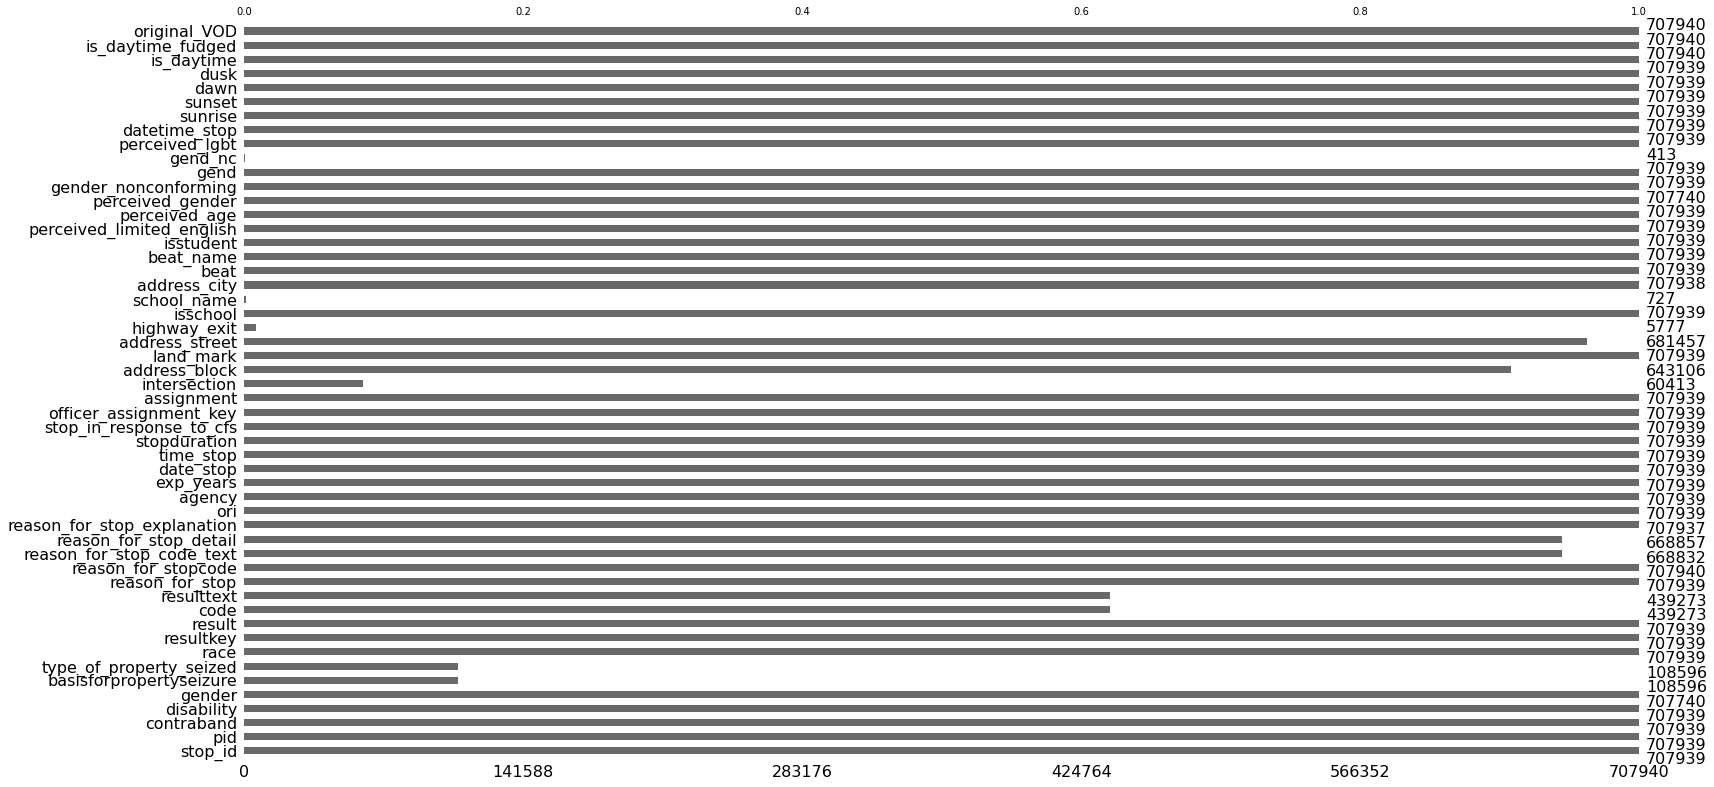

In [9]:
msno.bar(result_df)

In [10]:
#group all stops by day and night. 

<AxesSubplot:xlabel='Density', ylabel='race'>

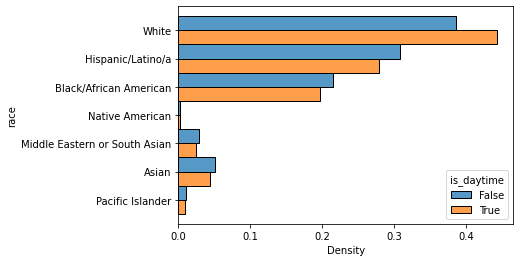

In [11]:
import seaborn as sns
sns.histplot(data=result_df, y='race', hue='is_daytime', stat='density', multiple='dodge', common_norm=False)

<AxesSubplot:xlabel='Density', ylabel='race'>

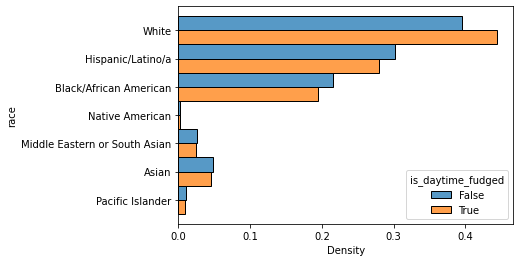

In [12]:
sns.histplot(data=result_df, y='race', hue='is_daytime_fudged', stat='density', multiple='dodge', common_norm=False)

In [13]:
checking_VOD_fudged_df = result_df[result_df['is_daytime'] != result_df['is_daytime_fudged']]
#checking_VOD_fudged_df

<AxesSubplot:xlabel='Density', ylabel='race'>

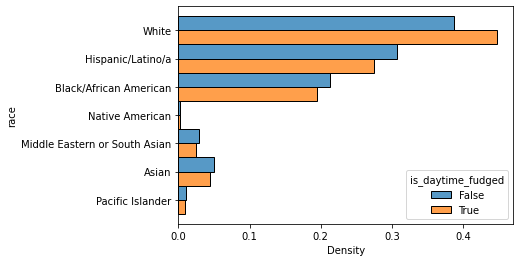

In [14]:
original_VOD_df = result_df[result_df['original_VOD'] == True]
sns.histplot(data=original_VOD_df, y='race', hue='is_daytime_fudged', stat='density', multiple='dodge', common_norm=False)

<AxesSubplot:xlabel='Density', ylabel='race'>

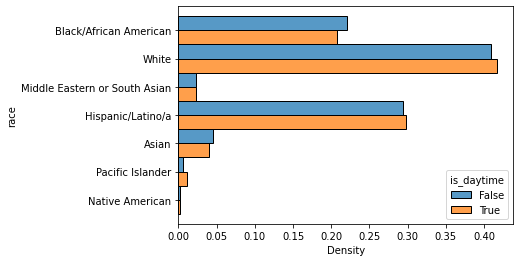

In [15]:
original_VOD_df_2 = result_df[result_df['original_VOD'] == False] 
sns.histplot(data=original_VOD_df_2, y='race', hue='is_daytime', stat='density', multiple='dodge', common_norm=False)

In [90]:
#removing all duplicate rows from result_df to make it cleaner

In [94]:
# cleaned_result_df = result_df.drop_duplicates()

In [109]:
unique_stop_df = result_df.groupby(['stop_id','pid'], as_index=False).size() 
multiple_charges_df = unique_stop_df[unique_stop_df['size'] > 1]
multiple_charges_df
multiple_charges_df['size'].describe()
multiple_charges_df['size'].idxmax()
y.loc[193431]
result_df.loc[179543]
foo = result_df[(result_df.stop_id == 179543)]
foo = foo[ (foo.pid == 1)]
foo.drop_duplicates(inplace=True)
foo


,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,result,...,gend_nc,perceived_lgbt,datetime_stop,sunrise,sunset,dawn,dusk,is_daytime,is_daytime_fudged,original_VOD
252866,179543.0,1.0,Firearm(s),None,Male,Evidence,Firearm(s),White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
252867,179543.0,1.0,Firearm(s),None,Male,Evidence,Firearm(s),White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
252868,179543.0,1.0,Firearm(s),None,Male,Evidence,Firearm(s),White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
252869,179543.0,1.0,Firearm(s),None,Male,Evidence,Firearm(s),White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
252870,179543.0,1.0,Firearm(s),None,Male,Evidence,Firearm(s),White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254205,179543.0,1.0,Cell phone(s) or electronic device(s),None,Male,Abandoned property,Vehicle,White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
254206,179543.0,1.0,Cell phone(s) or electronic device(s),None,Male,Abandoned property,Vehicle,White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
254207,179543.0,1.0,Cell phone(s) or electronic device(s),None,Male,Abandoned property,Vehicle,White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True
254208,179543.0,1.0,Cell phone(s) or electronic device(s),None,Male,Abandoned property,Vehicle,White,6.0,Custodial Arrest without warrant,...,NaN,No,2019-07-25 15:00:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,2019-07-25 05:58:03.714496-07:00,2019-07-25 19:51:51.033394-07:00,True,True,True


In [58]:
multiple_charges_df['size'].value_counts().head(5)


2    47675
4     5086
3     4983
8     1190
6     1181
Name: size, dtype: int64

In [78]:
common_multiple_charges_df = multiple_charges_df[multiple_charges_df['size'] <= 4 ]
temp_df = result_df[['stop_id', 'pid', 'race']]
common_multiple_charges_df = pd.merge(temp_df, common_multiple_charges_df, how="inner", on=["stop_id","pid"])

<AxesSubplot:xlabel='Count', ylabel='size'>

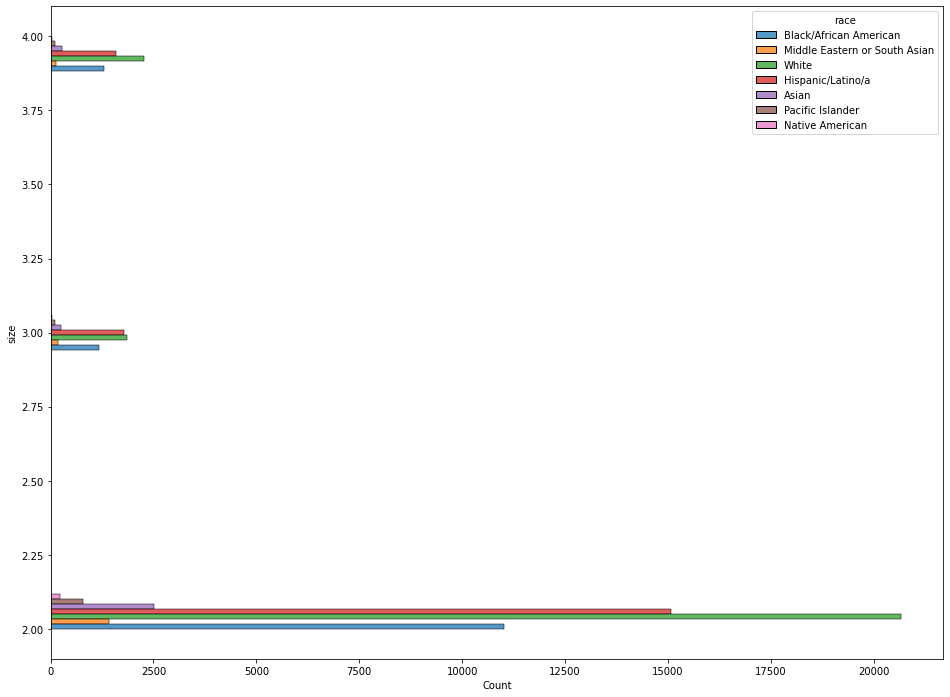

In [96]:
common_multiple_charges_df = common_multiple_charges_df.drop_duplicates()
sns.histplot(data=common_multiple_charges_df, y='size', hue='race', multiple='dodge', common_norm=False)

In [20]:
#result_df.columns

In [21]:
#group all the stop data by race to calculate + visualize overall racial proportions

In [22]:
stops_racial_breakdown_df = result_df.groupby('race', as_index=False).size()


In [23]:
result_racial_breakdown_df_tmp = result_df.groupby(['race','result'], as_index=False).size()

result_citation_for_infraction = result_racial_breakdown_df_tmp[result_racial_breakdown_df_tmp['result']=='Citation for infraction']
result_citation_for_infraction_with_stop = pd.merge(result_citation_for_infraction, stops_racial_breakdown_df,
                                                    how="outer", on=["race"])

result_citation_for_infraction_with_stop

,race,result,size_x,size_y
0,Asian,Citation for infraction,10373,32611
1,Black/African American,Citation for infraction,17916,144207
2,Hispanic/Latino/a,Citation for infraction,43524,204932
3,Middle Eastern or South Asian,Citation for infraction,6519,18043
4,Native American,Citation for infraction,225,1819
5,Pacific Islander,Citation for infraction,1256,6989
6,White,Citation for infraction,62011,299338


In [24]:
#sns.histplot(data=result_df[result_df['result'], y='race', hue='Citation for infraction' stat='density', multiple='dodge', common_norm=False)
#plt.rcParams['figure.figsize'] = (20, 10)

<AxesSubplot:xlabel='Density', ylabel='race'>

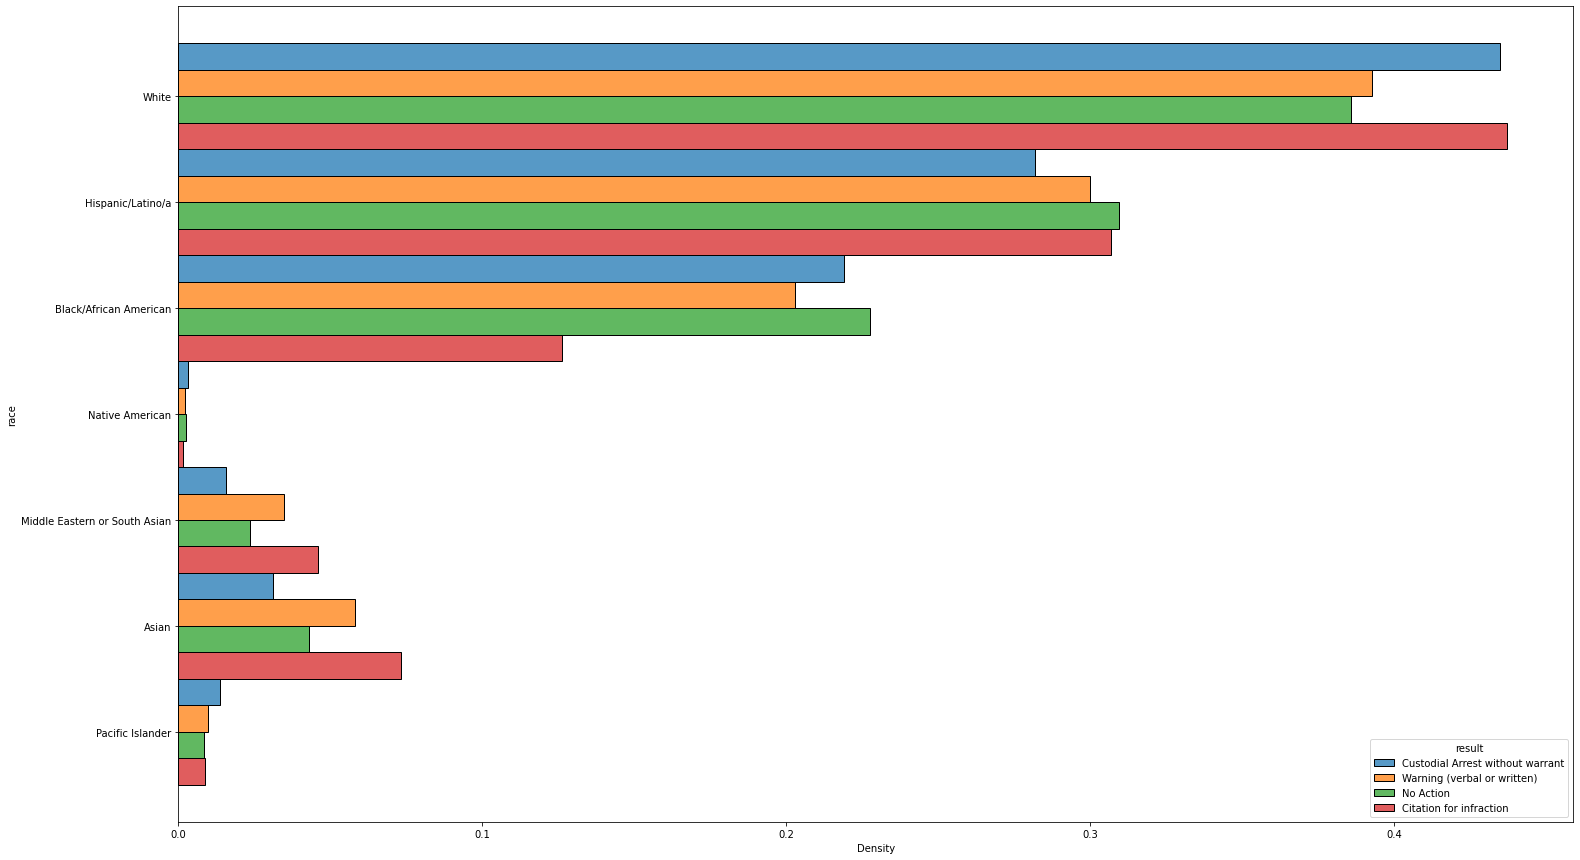

In [25]:
plt.rcParams['figure.figsize'] = (25, 15)
sns.histplot(data=result_df[result_df['result'].isin(['Citation for infraction', 'Custodial Arrest without warrant', 'Warning (verbal or written)', 'No Action'])], y='race', hue='result', stat='density', multiple='dodge', common_norm=False)

<AxesSubplot:xlabel='Density', ylabel='race'>

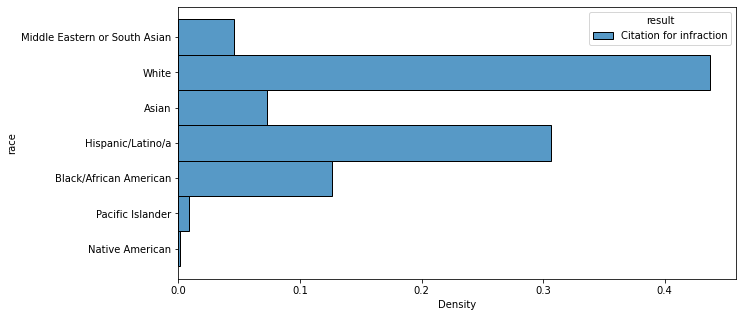

In [26]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data=result_df[result_df['result'].isin(['Citation for infraction'])], y='race', hue='result', stat='density', multiple='dodge', common_norm=False)

<AxesSubplot:xlabel='Density', ylabel='race'>

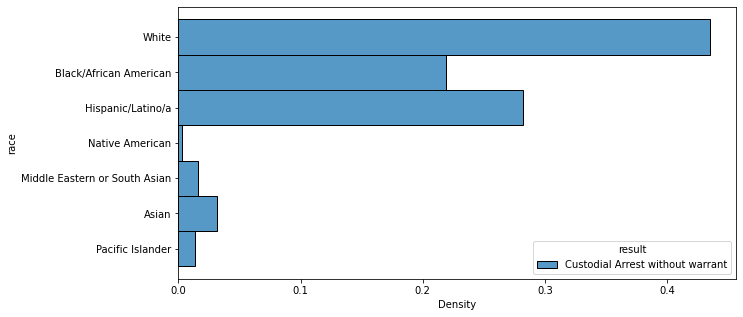

In [27]:
sns.histplot(data=result_df[result_df['result'].isin(['Custodial Arrest without warrant'])], y='race', hue='result', stat='density', multiple='dodge', common_norm=False)

<AxesSubplot:xlabel='Density', ylabel='race'>

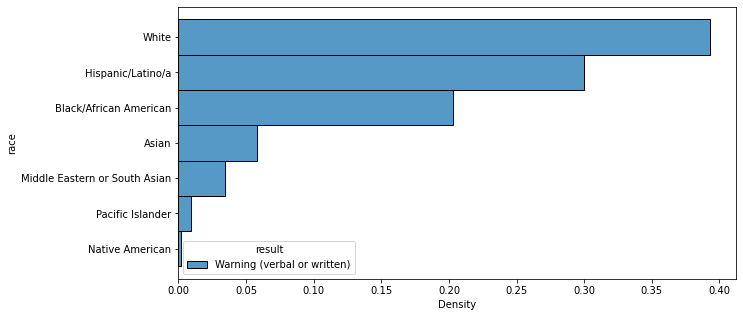

In [28]:
sns.histplot(data=result_df[result_df['result'].isin(['Warning (verbal or written)'])], y='race', hue='result', stat='density', multiple='dodge', common_norm=False)

<AxesSubplot:xlabel='Density', ylabel='race'>

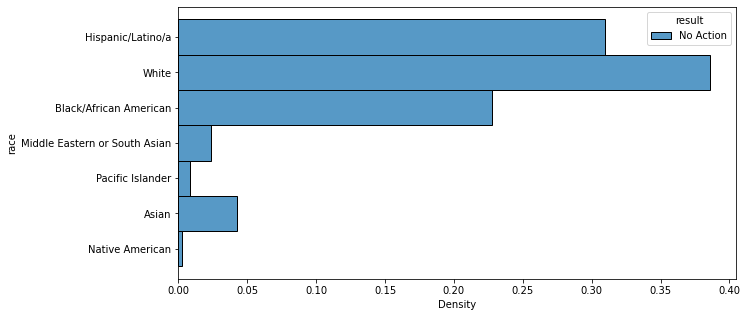

In [29]:
sns.histplot(data=result_df[result_df['result'].isin(['No Action'])], y='race', hue='result', stat='density', multiple='dodge', common_norm=False)

In [30]:
result_df['result'].value_counts()

Citation for infraction                                                      141824
Custodial Arrest without warrant                                             140604
Field interview card completed                                               123031
Warning (verbal or written)                                                  105831
No Action                                                                     73914
In-field cite and release                                                     51043
Custodial Arrest pursuant to outstanding warrant                              29351
Psychiatric hold                                                              27337
Noncriminal transport or caretaking transport                                 12668
Contacted parent/legal guardian or other person responsible for the minor      2233
Referral to school administrator                                                 47
Contacted U.S. Department of Homeland Security                              

In [31]:
stops_racial_breakdown_df['proportion'] = stops_racial_breakdown_df['size']/stops_racial_breakdown_df['size'].sum()
stops_racial_breakdown_df

,race,size,proportion
0,Asian,32611,0.046065
1,Black/African American,144207,0.203700
2,Hispanic/Latino/a,204932,0.289477
3,Middle Eastern or South Asian,18043,0.025487
4,Native American,1819,0.002569
5,Pacific Islander,6989,0.009872
6,White,299338,0.422830


In [32]:
#census data has middle eastern as part of the white category
#census data lists south asian as part of the asian category
#have not found a specific/accurate number of middle eastern OR 
#south asian individuals in SD
#making it difficult to figure out how exactly to make the split
#without sacrificing accuracy

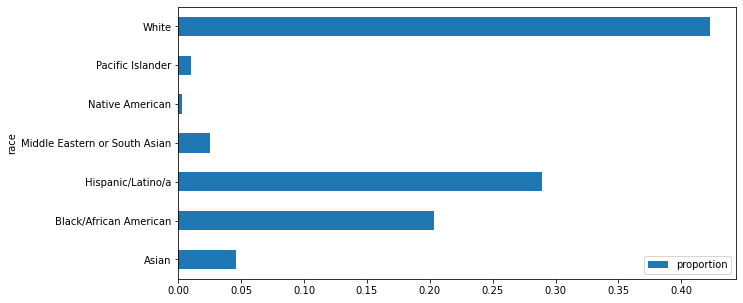

In [33]:
plt.rcParams['figure.figsize'] = (10, 5)
stops_racial_breakdown_df.plot.barh(x="race", y=["proportion"])
plt.show()

In [34]:
#group stop data by the reason for the stop to calculate + visualize proportions (each reason vs stops overall)

In [35]:
stop_by_reason_df = result_df.groupby(['reason_for_stop'], as_index=False).size()
stop_by_reason_df['proportion'] = stop_by_reason_df['size']/stop_by_reason_df['size'].sum()

In [36]:
stop_by_reason_df 

,reason_for_stop,size,proportion
0,Consensual Encounter resulting in a search,8803,0.012435
1,Determine whether the student violated school ...,70,0.000099
2,Investigation to determine whether the person ...,8483,0.011983
3,Knowledge of outstanding arrest warrant/wanted...,9984,0.014103
4,Known to be on Parole / Probation / PRCS / Man...,11742,0.016586
5,Possible conduct warranting discipline under E...,24,0.000034
6,Reasonable Suspicion,381678,0.539140
7,Traffic Violation,287155,0.405621


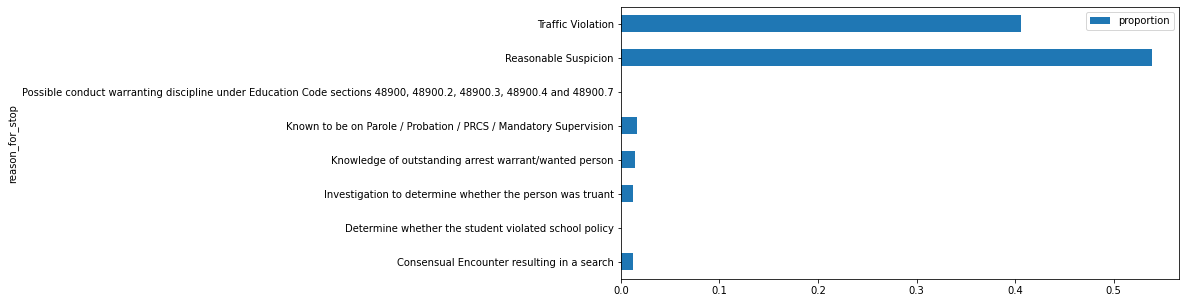

In [37]:
stop_by_reason_df.plot.barh(x="reason_for_stop", y=["proportion"])
plt.show()

In [38]:
#calculate the racial breakdown (amount & proportion) per each reason for the stop 

In [39]:
reason_racial_breakdown_df = result_df.groupby(['reason_for_stop', 'race'], as_index=False).size()

In [40]:
c_ent = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Consensual Encounter resulting in a search' , 'size'].sum()
student = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Determine whether the student violated school policy' , 'size'].sum()
truant = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Investigation to determine whether the person was truant' , 'size'].sum()
warrant = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Knowledge of outstanding arrest warrant/wanted person' , 'size'].sum()
parole = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Known to be on Parole / Probation / PRCS / Mandatory Supervision' , 'size'].sum()
conduct = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7' , 'size'].sum()
suspicion = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Reasonable Suspicion' , 'size'].sum()
traffic = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Traffic Violation' , 'size'].sum()
    

In [41]:
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Consensual Encounter resulting in a search", "total per reason"] = c_ent
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Determine whether the student violated school policy", "total per reason"] = student
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Investigation to determine whether the person was truant", "total per reason"] = truant
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Knowledge of outstanding arrest warrant/wanted person", "total per reason"] = warrant
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Known to be on Parole / Probation / PRCS / Mandatory Supervision", "total per reason"] = parole
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7", "total per reason"] = conduct
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Reasonable Suspicion", "total per reason"] = suspicion
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Traffic Violation", "total per reason"] = traffic

In [42]:
reason_racial_breakdown_df['racial proportion per reason'] = reason_racial_breakdown_df['size']/reason_racial_breakdown_df['total per reason']

In [43]:
reason_racial_breakdown_df

,reason_for_stop,race,size,total per reason,racial proportion per reason
0,Consensual Encounter resulting in a search,Asian,333,8803.0,0.037828
1,Consensual Encounter resulting in a search,Black/African American,1750,8803.0,0.198796
2,Consensual Encounter resulting in a search,Hispanic/Latino/a,2756,8803.0,0.313075
3,Consensual Encounter resulting in a search,Middle Eastern or South Asian,128,8803.0,0.014540
4,Consensual Encounter resulting in a search,Native American,45,8803.0,0.005112
5,Consensual Encounter resulting in a search,Pacific Islander,95,8803.0,0.010792
6,Consensual Encounter resulting in a search,White,3696,8803.0,0.419857
7,Determine whether the student violated school ...,Asian,1,70.0,0.014286
8,Determine whether the student violated school ...,Black/African American,5,70.0,0.071429
9,Determine whether the student violated school ...,Hispanic/Latino/a,47,70.0,0.671429


In [44]:
#pivot the racial breadown by reason data so that it's easier to visualize 
#visualize in stacked bar chart form

In [45]:
pivoted_df = reason_racial_breakdown_df.pivot(index='reason_for_stop', columns='race', values='size')
pivoted_df

race,Asian,Black/African American,Hispanic/Latino/a,Middle Eastern or South Asian,Native American,Pacific Islander,White
reason_for_stop,,,,,,,
Consensual Encounter resulting in a search,333.0,1750.0,2756.0,128.0,45.0,95.0,3696.0
Determine whether the student violated school policy,1.0,5.0,47.0,2.0,NaN,NaN,15.0
Investigation to determine whether the person was truant,381.0,1991.0,2211.0,147.0,28.0,86.0,3639.0
Knowledge of outstanding arrest warrant/wanted person,328.0,2553.0,2744.0,180.0,77.0,131.0,3971.0
Known to be on Parole / Probation / PRCS / Mandatory Supervision,308.0,3174.0,3721.0,123.0,44.0,147.0,4225.0
"Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7",10.0,NaN,6.0,NaN,NaN,NaN,8.0
Reasonable Suspicion,11042.0,84421.0,96182.0,5869.0,1222.0,3246.0,179696.0
Traffic Violation,20208.0,50313.0,97265.0,11594.0,403.0,3284.0,104088.0


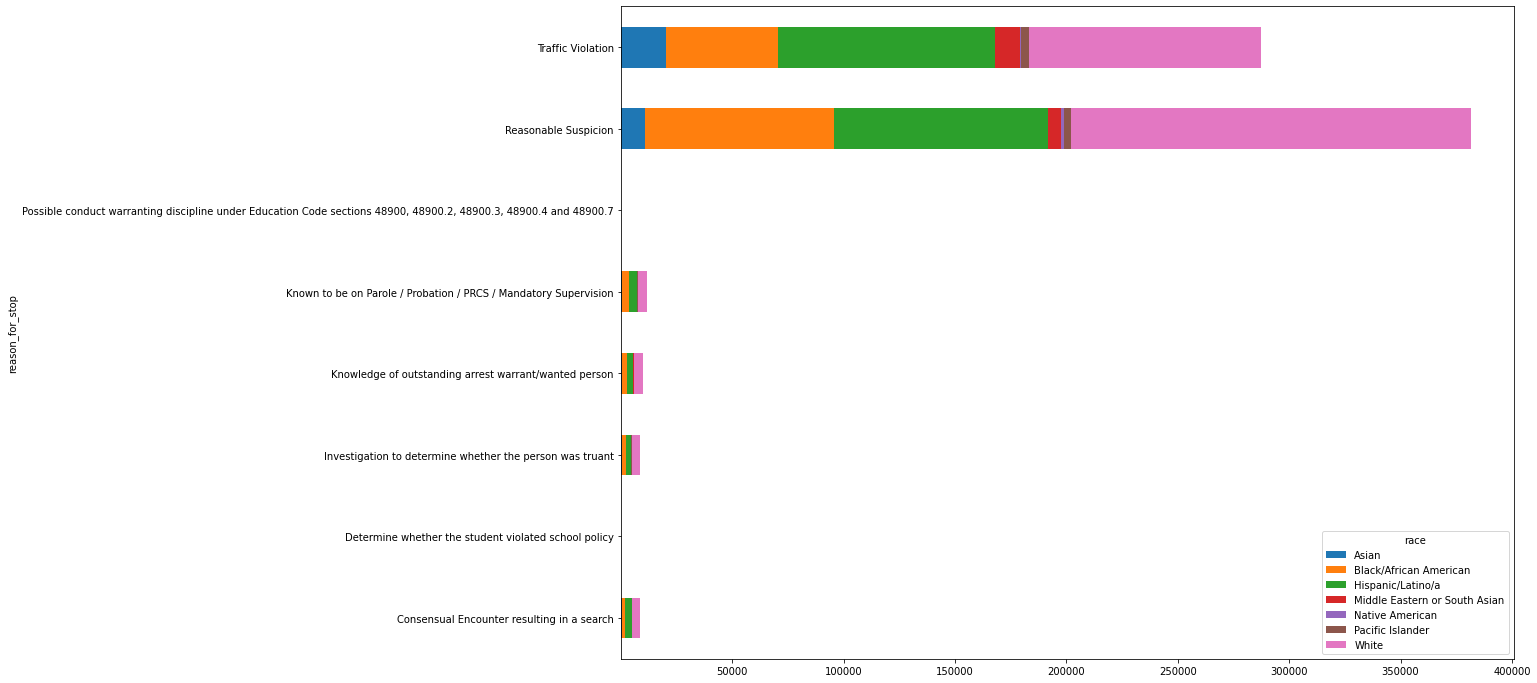

In [46]:
plt.rcParams['figure.figsize'] = (16, 12)
pivoted_df.plot.barh(stacked=True)
plt.show()

In [47]:
#group data by reason and then result + calculate racial breakdown for each reason/result combination

In [48]:
result_racial_breakdown_df = result_df.groupby(['reason_for_stop','result', 'race'], as_index=False).size()

In [49]:
result_racial_breakdown_df

,reason_for_stop,result,race,size
0,Consensual Encounter resulting in a search,Citation for infraction,Asian,7
1,Consensual Encounter resulting in a search,Citation for infraction,Black/African American,51
2,Consensual Encounter resulting in a search,Citation for infraction,Hispanic/Latino/a,105
3,Consensual Encounter resulting in a search,Citation for infraction,Middle Eastern or South Asian,8
4,Consensual Encounter resulting in a search,Citation for infraction,Native American,2
...,...,...,...,...
443,Traffic Violation,Warning (verbal or written),Hispanic/Latino/a,23564
444,Traffic Violation,Warning (verbal or written),Middle Eastern or South Asian,3158
445,Traffic Violation,Warning (verbal or written),Native American,121
446,Traffic Violation,Warning (verbal or written),Pacific Islander,787


In [50]:
#pivot the racial breadown by reason/result data so that it's easier to visualize 
#visualize in stacked bar chart form

In [51]:
pivoted_with_reason_result_df = result_racial_breakdown_df.pivot(index=["reason_for_stop", "result"], columns=["race"],values="size")
pivoted_with_reason_result_df = pivoted_with_reason_result_df.div(pivoted_with_reason_result_df.sum(axis=1), axis=0)

In [52]:
temp = pivoted_with_reason_result_df.loc[("Traffic Violation", slice(None))]
temp.div(temp.sum(axis=1), axis=0)

race,Asian,Black/African American,Hispanic/Latino/a,Middle Eastern or South Asian,Native American,Pacific Islander,White
result,,,,,,,
Citation for infraction,0.085716,0.108974,0.331239,0.053482,0.000987,0.009210,0.410393
Contacted U.S. Department of Homeland Security,NaN,0.062500,0.125000,NaN,NaN,0.375000,0.437500
Contacted parent/legal guardian or other person responsible for the minor,0.073529,0.421569,0.289216,0.024510,NaN,NaN,0.191176
Custodial Arrest pursuant to outstanding warrant,0.053922,0.215686,0.328627,0.004510,0.000588,0.021569,0.375098
Custodial Arrest without warrant,0.047300,0.259809,0.320069,0.012307,0.001077,0.023046,0.336391
Field interview card completed,0.044854,0.318658,0.391253,0.012774,0.001804,0.009605,0.221052
In-field cite and release,0.054377,0.158357,0.314433,0.043772,0.002113,0.009084,0.417864
No Action,0.059105,0.224413,0.389078,0.030556,0.001887,0.009315,0.285645
Noncriminal transport or caretaking transport,0.041237,0.164948,0.396907,0.036082,0.010309,0.010309,0.340206


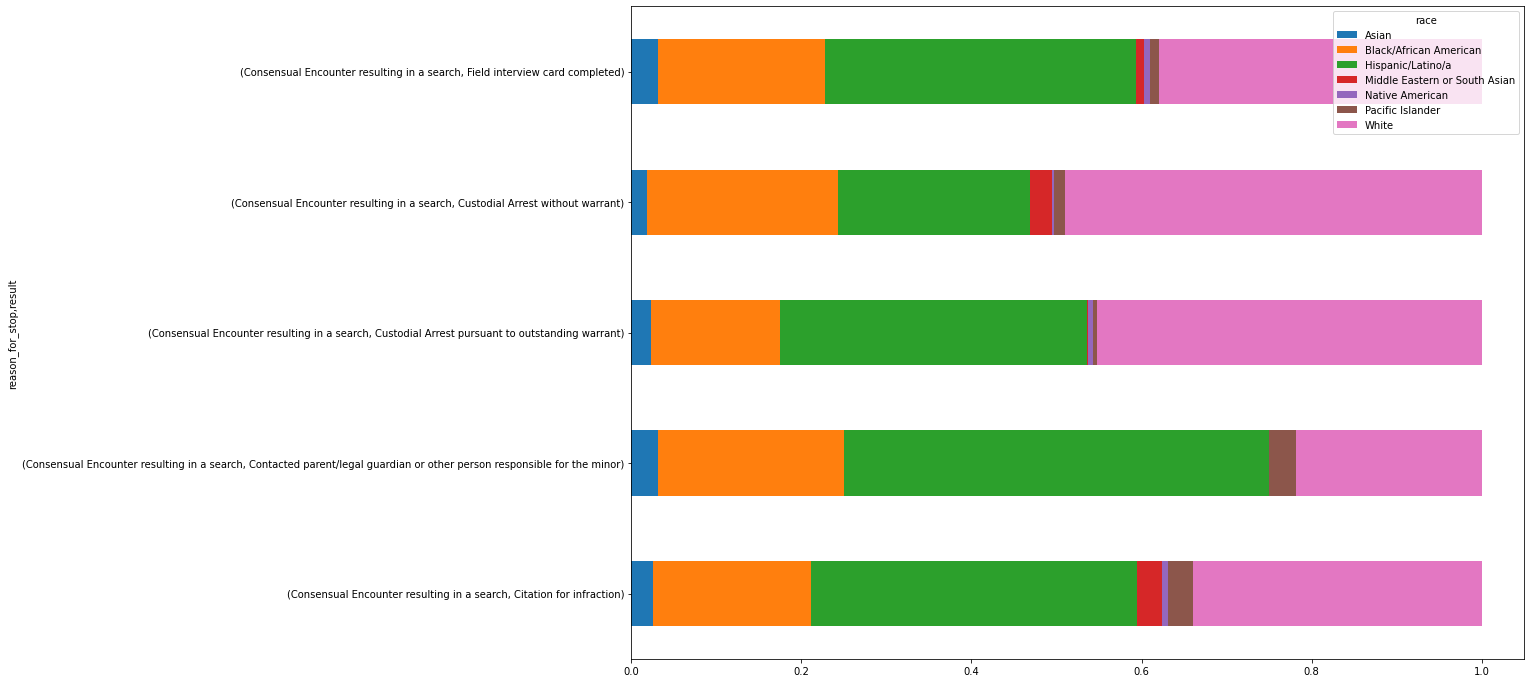

In [53]:
pivoted_with_reason_result_head_df = pivoted_with_reason_result_df.head(5)
pivoted_with_reason_result_head_df.plot.barh(stacked=True)
plt.show()